#Introduction to Machine Translation (MT):

Machine Translation is a subfield of artificial intelligence (AI) and computational linguistics that focuses on the development of systems capable of automatically translating text or speech from one language to another. The primary goal of machine translation is to enable effective communication between people who speak different languages by automating the process of language translation.

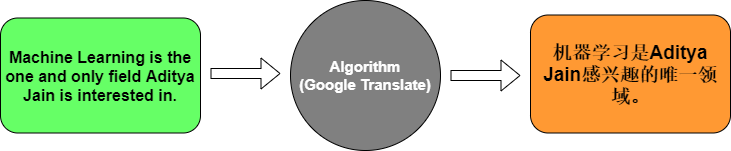

Challenges in Machine Translation:
- Ambiguity
- Idiomatic Expressions
- Low-Resource Languages

Applications of Machine Translation:
- Global Business and E-commerce
-Cross-Cultural Communication
- Multilingual Content Creation
- Language Learning



#Key Components of Machine Translation:
- Encoder-Decoder Architecture:

Neural Machine Translation systems typically use an encoder-decoder architecture. The encoder processes the input text and converts it into a fixed-size context vector, which the decoder then uses to generate the translated output.

- Attention Mechanism:

Attention mechanisms allow the model to focus on different parts of the input sequence when generating each part of the output sequence. This has greatly improved the ability of the model to handle long sentences and capture nuanced language structures.

- Parallel Corpora:

Training machine translation models requires large parallel corpora, which are sets of texts in two or more languages that are translations of each other. These corpora are used to train the models to understand the relationships between languages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Example bilingual dataset
english_sentences = ["Hello.", "How are you?", "This is a machine translation example."]
french_sentences = ["Bonjour.", "Comment ça va?", "Ceci est un exemple de traduction automatique."]

# Tokenize the sentences
tokenizer_eng = Tokenizer()
tokenizer_eng.fit_on_texts(english_sentences)
eng_sequences = tokenizer_eng.texts_to_sequences(english_sentences)
eng_word_index = tokenizer_eng.word_index

tokenizer_frn = Tokenizer()
tokenizer_frn.fit_on_texts(french_sentences)
frn_sequences = tokenizer_frn.texts_to_sequences(french_sentences)
frn_word_index = tokenizer_frn.word_index

# Padding sequences
eng_padded = pad_sequences(eng_sequences)
frn_padded = pad_sequences(frn_sequences)

# Train-test split
eng_train, eng_test, frn_train, frn_test = train_test_split(eng_padded, frn_padded, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(eng_word_index) + 1, output_dim=64, input_length=eng_padded.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.RepeatVector(frn_padded.shape[1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(frn_word_index) + 1, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(eng_train, np.expand_dims(frn_train, -1), epochs=10, batch_size=1, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(eng_test, np.expand_dims(frn_test, -1))
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 2.4882 - accuracy: 0.0000e+00 - val_loss: 2.4846 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 63ms/step - loss: 2.4793 - accuracy: 0.5714 - val_loss: 2.4868 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 58ms/step - loss: 2.4706 - accuracy: 0.5714 - val_loss: 2.4892 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 47ms/step - loss: 2.4615 - accuracy: 0.5714 - val_loss: 2.4918 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 48ms/step - loss: 2.4517 - accuracy: 0.5714 - val_loss: 2.4946 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 2.4409 - accuracy: 0.5714 - val_loss: 2.4977 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 47ms/step - loss: 2.4287 - accuracy: 0.5714 - val_loss: 2.5013 - val_accuracy: 0.0000e+00
E

In [ ]:
# Inference
def translate_sentence(sentence, model, eng_tokenizer, frn_tokenizer):
    sequence = eng_tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=eng_padded.shape[1], padding='post')
    predicted_sequence = model.predict(padded_sequence)
    translated_sequence = np.argmax(predicted_sequence, axis=-1)
    translated_sentence = frn_tokenizer.sequences_to_texts(translated_sequence)
    return translated_sentence[0]

# Example Inference
input_sentence = "How are you?"
translated_sentence = translate_sentence(input_sentence, model, tokenizer_eng, tokenizer_frn)
print(f'Input: {input_sentence}\nTranslation: {translated_sentence}')

1/1 [==============================] - 0s 32ms/step
Input: How are you?
Translation: ['']


#Use Case: Language Translation (English-French)

A global e-commerce company wants to expand its reach to French-speaking customers and provide a seamless shopping experience. The company needs a language translation solution to automatically translate product listings, customer reviews, and other relevant content from English to French.

link: https://www.kaggle.com/datasets/devicharith/language-translation-englishfrench